In [ ]:
import Pkg
Pkg.activate(".")

In [ ]:
Pkg.add(["Random", "LinearAlgebra","FFTW","Plots"])

In [3]:
using Random, FFTW, Plots

In [1]:
# Create a simple signal with two frequencies
dt = 0.001

t = 0:dt:1

f = sin.(2 * π * 50 .* t) + sin.(2 * π * 120 .* t)  # Sum of 2 frequencies

f .+= 2.5 .* randn(length(t))  # Add some noise

1001-element Vector{Float64}:
 -2.031706701628469
 -2.857817065928651
  1.7910548273763056
  1.126287362697478
 -0.2819654375755152
  0.1966227751791865
 -5.665097834530282
  0.5872946499592513
  2.2155574919999723
  1.5159046357801502
  3.3968444058724545
  4.632536981846553
 -1.3918570363234957
  ⋮
 -1.5114738070281117
  2.118528628010422
 -1.6435458281137156
  1.1278644925172954
  2.068762160773483
  3.165320815789084
  2.6999120639392045
  3.993485306209747
 -2.017666244624879
 -5.7650958044125495
 -2.2019769679764924
  1.722590216492147

In [4]:
# Compute the Fast Fourier Transform FFT
n = length(t)

fhat = fft(f)  # Compute the fast Fourier transform

PSD = fhat .* conj(fhat) / n  # Power spectrum (power per freq)

freq = 1 / (dt * n) * (0:n)  # Create x-axis of frequencies in Hz

L = 1:floor(Int, n / 2)  # Only plot the first half of freqs

1:500

In [6]:
# Use the PSD to filter out noise
indices = real(PSD) .> 100  # Use the real part of PSD to find all freqs with large power
PSDclean = PSD .* indices    # Zero out all others

fhat = indices .* fhat       # Zero out small Fourier coeffs. in Y

ffilt = ifft(fhat)           # Inverse FFT for filtered time signal

1001-element Vector{ComplexF64}:
    0.4381976426502907 + 1.1357326445715887e-16im
     1.244463958640912 + 0.0im
    1.5690573530702712 - 1.1357326445715887e-16im
    1.3480196991446278 - 1.703598966857383e-16im
    0.7829684126483182 - 1.1357326445715887e-16im
   0.22400132907414683 + 5.678663222857944e-17im
 -0.024053708268557888 - 2.839331611428972e-17im
   0.13320423507987025 + 6.033579674286565e-17im
     0.532563916121507 + 1.0647493542858644e-16im
    0.8491371359511508 + 5.678663222857944e-17im
    0.7827647696158274 - 5.678663222857944e-17im
   0.23300340312477347 + 1.1357326445715887e-16im
   -0.6332108289516841 - 1.1357326445715887e-16im
                       ⋮
   -0.1468670717305799 + 8.879515371927412e-17im
    -0.747067198619857 + 4.0358326970395667e-16im
   -0.8693133156264189 + 1.3291229205069146e-16im
   -0.5838331310248634 + 7.980346293605882e-17im
  -0.17533171317400087 + 1.0333654160994407e-16im
  0.023767678944719765 + 7.109221068106324e-17im
  -0.175940730328888

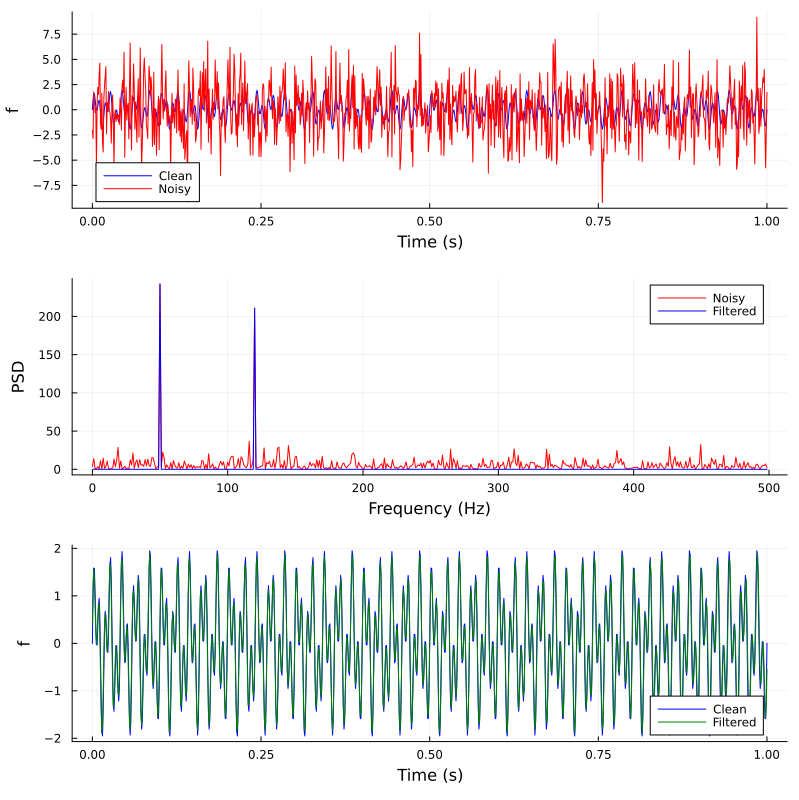

In [13]:
# Create the clean signal (without noise) for comparison
clean_signal = sin.(2 * π * 50 .* t) + sin.(2 * π * 120 .* t)

# (1) Plot the noisy signal and clean signal
p1 = plot(t, clean_signal, label="Clean", color=:blue, xlabel="Time (s)", ylabel="f")
plot!(t, f, label="Noisy", color=:red)

# (2) Plot the power spectrum before and after filtering
p2 = plot(freq[L], real(PSD[L]), label="Noisy", color=:red, xlabel="Frequency (Hz)", ylabel="PSD")
plot!(freq[L], real(PSDclean[L]), label="Filtered", color=:blue)

# (3) Plot the clean signal and de-noised signal
p3 = plot(t, clean_signal, label="Clean", color=:blue, xlabel="Time (s)", ylabel="f")
plot!(t, real(ffilt), label="Filtered", color=:green)

# Display all three plots together
plot(p1, p2, p3, layout=(3, 1), size=(800, 800))